<a href="https://colab.research.google.com/github/Nasir-Sharif/Google-Colab-File-Fire-Risk-Prediction-System/blob/main/AI_Bootcamp_Lab_Project_%E2%80%93_Fire_Risk_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task# 01 Exploratory Data Analysis (EDA)**

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the CSV files


Saving fire_risk_test.csv to fire_risk_test.csv
Saving fire_risk_train.csv to fire_risk_train.csv


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
df = pd.read_csv("fire_risk_train.csv")  # Check the filename matches what you uploaded


In [ ]:
# Dataset shape and column names
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Basic stats
print("\nBasic Statistics:\n", df.describe())


Shape of dataset: (240, 9)

Column Names: ['temperature_C', 'humidity_percent', 'wind_speed_kmph', 'air_quality_index', 'vegetation_index', 'emergency_response_time_min', 'fire_risk_score', 'fire_risk_level', 'random_noise']

Missing values:
 temperature_C                  0
humidity_percent               0
wind_speed_kmph                0
air_quality_index              0
vegetation_index               0
emergency_response_time_min    0
fire_risk_score                0
fire_risk_level                0
random_noise                   0
dtype: int64

Data types:
 temperature_C                  float64
humidity_percent               float64
wind_speed_kmph                float64
air_quality_index              float64
vegetation_index               float64
emergency_response_time_min    float64
fire_risk_score                float64
fire_risk_level                 object
random_noise                   float64
dtype: object

Basic Statistics:
        temperature_C  humidity_percent  wind_spe

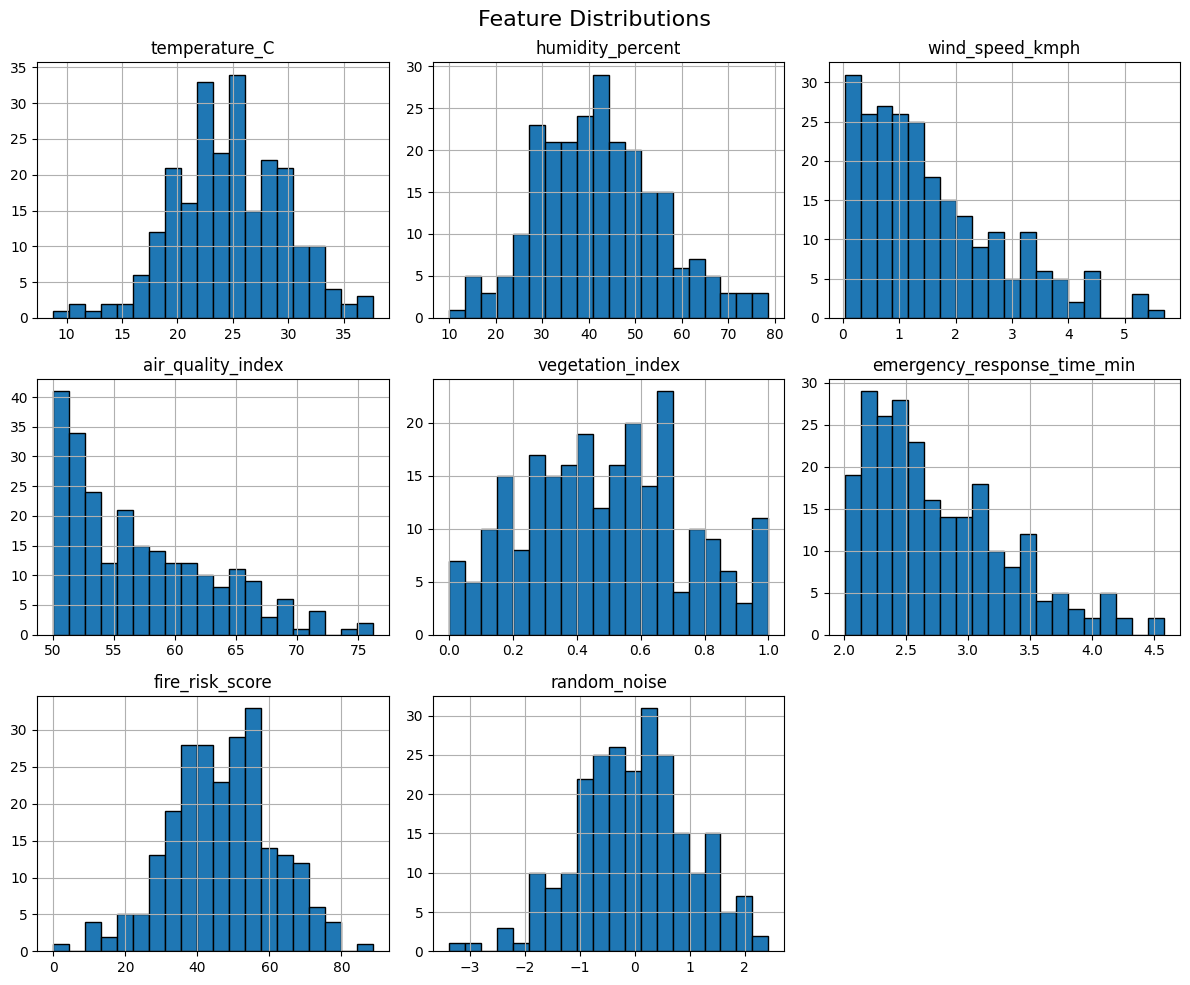

In [ ]:
# Plot histograms to understand feature distributions
df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


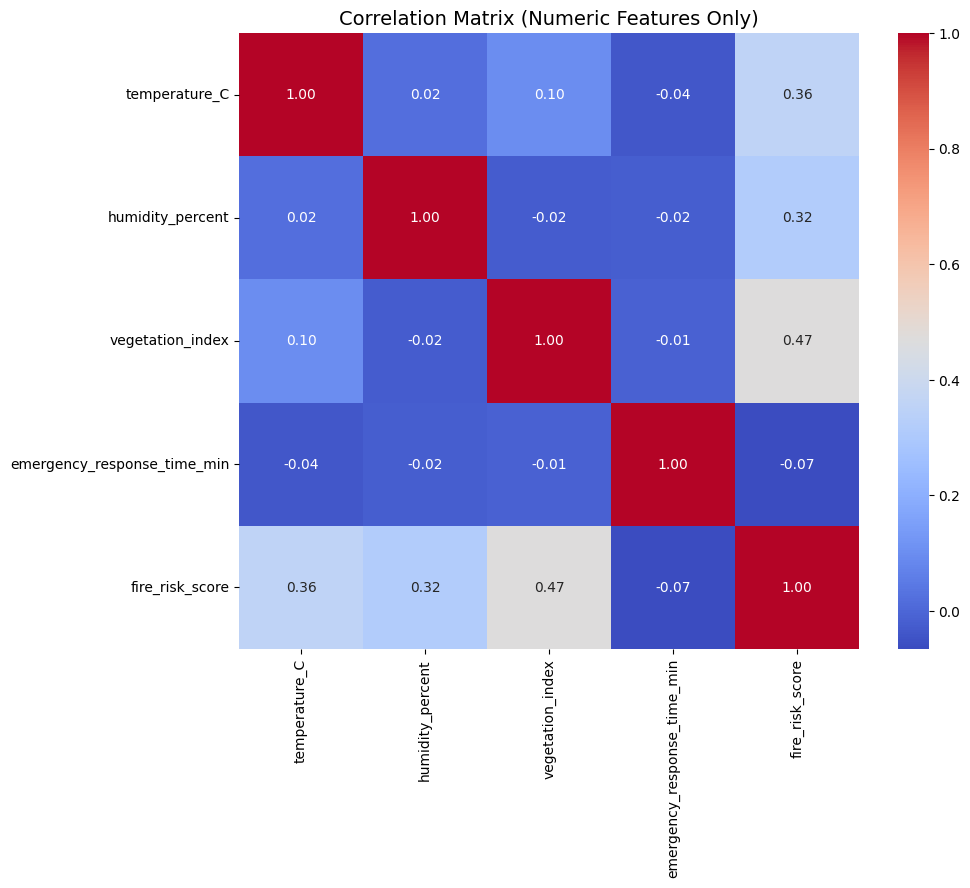

In [ ]:
# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)", fontsize=14)
plt.show()


df = df.drop(columns=['random_noise', 'wind_speed_kmph','air_quality_index'])
 i have done this to remove the irrelevant features

Now we see that the data dont have any missing values and also that which features have strong relation with the fire risk score so we eliminated those features that does not have any relation with the fire risk score (The range of the relation varies between -1,0,+1) that was random noise so we dropped that random noise from the data

**Task #02 now goal of the task is to predict the linear regeration using a single feature to predict the fire risk score so we choosed the vegetation index as it as most positive value so it is best to choose to again find the fire risk score**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Use only vegetation_index to predict fire_risk_score
X = df[['vegetation_index']]  # input feature
y = df['fire_risk_score']     # target

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on test set:", rmse)


RMSE on test set: 11.618970288016486


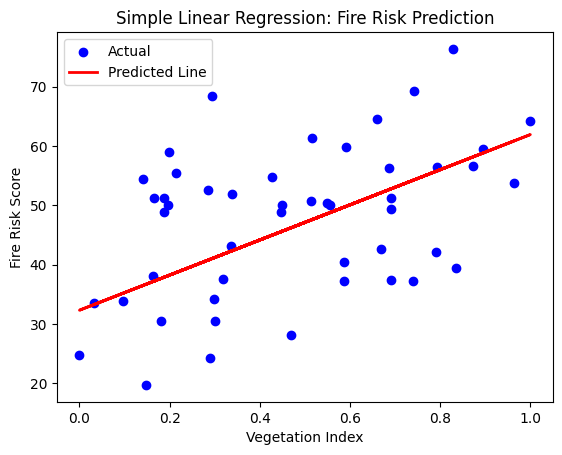

In [ ]:
# Plot actual data and regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('Vegetation Index')
plt.ylabel('Fire Risk Score')
plt.title('Simple Linear Regression: Fire Risk Prediction')
plt.legend()
plt.show()


RMSE (Root Mean Squared Error): so basically it is a metric that tells how much  average error is between the actual and predicted values so we have value of 11.6178...,This means:

Hamara model jab vegetation_index se fire_risk_score predict karta hai, tou wo average 11.62 points ka error karta hai.

✅ Good thing: Ye sirf aik feature pe based hai (vegetation_index)
🔴 Limitation: Dusre important features use nahi hue (like temperature, humidity, etc.) that's why hamara jo model ha usko improve kia jaskta ha jo k hum next task mn kren gn **bold text**

**Task #03 Multiple Variable Regression (scikit-learn)**
as we will use now all the relavent features for the better fire_risk_prediction now here the Multiple variable regression comes in
🔹 Step-by-Step Plan
we will Use all good features (drop noisy ones).

Train a Linear Regression model.

Evaluate the new RMSE.

Compare with Task 2’s RMSE.

Now for better prediction i should use the air quality index too so im reloading the dataset and then removing the most irrelavent columns like random noise and wind speed

In [ ]:
df = pd.read_csv("fire_risk_train.csv")  # Reload the full dataset


In [ ]:
df = df.drop(columns=['random_noise', 'wind_speed_kmph'])  # Keep air_quality_index this time


In [ ]:
features_to_use = ['temperature_C', 'humidity_percent', 'air_quality_index',
                   'vegetation_index', 'emergency_response_time_min']
X = df[features_to_use]
y = df['fire_risk_score']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Multiple Regression RMSE:", rmse)


Multiple Regression RMSE: 10.603731823115005


so, i successfully improved  model using multiple linear regression.

🔍 Interpretation of RMSE:
Previous RMSE (from Task 2): ~11.62

New RMSE (Multiple Regression): ~10.60

This means:

our new model predicts fire risk scores more accurately, with average error reduced by ~1.02 units.

A lower RMSE indicates better model performance. our model is now better at fitting the data than the previous simple regression model (Task 2).



**Task #04 want to predict fire_risk_score using one input feature: temperature_c, but instead of using Scikit-Learn's built-in linear regression, we'll build it from scratch using gradient descent**

In [ ]:
df = pd.read_csv("fire_risk_train.csv")  # Reload the full dataset


In [ ]:
print(df.columns)


Index(['temperature_C', 'humidity_percent', 'wind_speed_kmph',
       'air_quality_index', 'vegetation_index', 'emergency_response_time_min',
       'fire_risk_score', 'fire_risk_level', 'random_noise'],
      dtype='object')


In [ ]:
import numpy as np

# Feature and target
X_gd = df[['temperature_C','vegetation_index','humidity_percent']].values  # Select temperature as feature
y_gd = df['fire_risk_score'].values.reshape(-1, 1)  # Target reshaped to column vector


In [ ]:
X_mean = np.mean(X_gd),
X_std = np.std(X_gd)
X_gd_norm = (X_gd - X_mean) / X_std


In [ ]:
X_b = np.c_[np.ones((X_gd_norm.shape[0], 1)), X_gd_norm]


In [ ]:
theta = np.random.randn(4, 1)  # Random weights: [θ₀, θ₁, θ₂, θ₃]
theta = np.random.randn(X_b.shape[1], 1)

learning_rate = 0.05
n_iterations = 2000
m = X_b.shape[0]  # Number of data points

In [ ]:
loss_history = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_gd)  # Derivative of MSE Loss
    theta = theta - learning_rate * gradients  # Update weights

    loss = np.mean((X_b.dot(theta) - y_gd) ** 2)  # Mean Squared Error
    loss_history.append(loss)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                     # Normalization object
X_normalized = scaler.fit_transform(X)     # Transform all features between 0-1


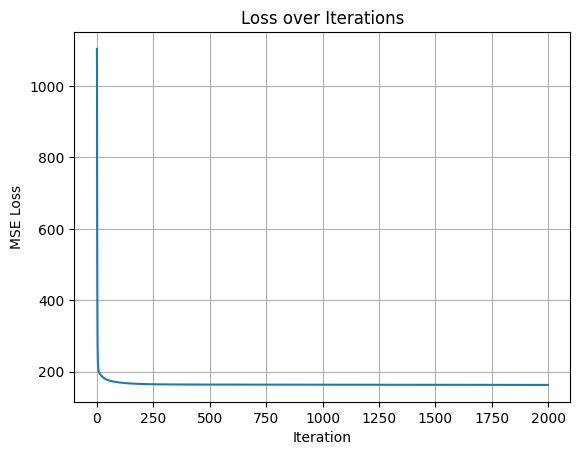

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = X_b.dot(theta)
rmse = np.sqrt(mean_squared_error(y_gd, y_pred))
print("Custom Gradient Descent RMSE:", rmse)


Custom Gradient Descent RMSE: 12.768530798517546


**Task #05 Convert Score to Labels (Low / Medium / High)**

In [ ]:
# Step 1: Check the score range
print("Min score:", df['fire_risk_score'].min())
print("Max score:", df['fire_risk_score'].max())

# Step 2 & 3: Convert to categorical labels
def score_to_label(score):
    if score < 35:
        return "Low"
    elif score < 70:
        return "Medium"
    else:
        return "High"

df['fire_risk_level'] = df['fire_risk_score'].apply(score_to_label)

# Preview result
df[['fire_risk_score', 'fire_risk_level']].head(10)


Min score: 0.0
Max score: 88.72087652619152


,fire_risk_score,fire_risk_level
0,36.298824,Medium
1,41.477312,Medium
2,39.487676,Medium
3,43.355859,Medium
4,55.468398,Medium
5,43.455366,Medium
6,37.409405,Medium
7,60.731177,Medium
8,33.926432,Low
9,59.905752,Medium


from matplotlib import pyplot as plt
_df_0['fire_risk_score'].plot(kind='hist', bins=20, title='fire_risk_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('fire_risk_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['fire_risk_score'].plot(kind='line', figsize=(8, 4), title='fire_risk_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['fire_risk_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='fire_risk_score', y='fire_risk_level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-65-983905077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fire_risk_level', palette='coolwarm')


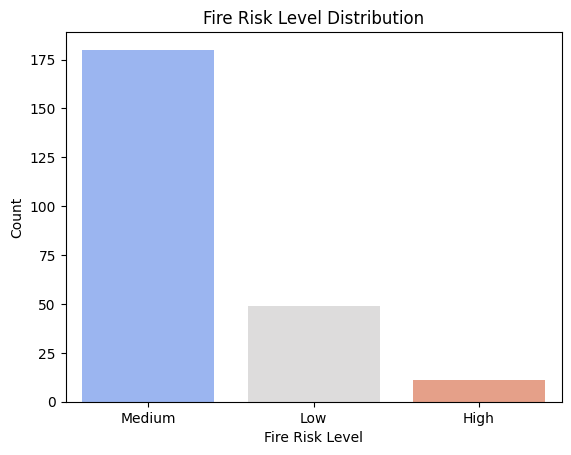

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='fire_risk_level', palette='coolwarm')
plt.title('Fire Risk Level Distribution')
plt.xlabel('Fire Risk Level')
plt.ylabel('Count')
plt.show()


**Task #06  Train Logistic Regression to classify fire_risk_level**

In [ ]:
# 1. Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Encode the fire_risk_level into numbers
le = LabelEncoder()
df['fire_risk_level_encoded'] = le.fit_transform(df['fire_risk_level'])
# Example mapping: Low=1, Medium=2, High=0 (check le.classes_ to confirm)

# Select features and target
X = df.drop(columns=['fire_risk_score', 'fire_risk_level', 'fire_risk_level_encoded'])  # all feature columns
y = df['fire_risk_level_encoded']  # target: classification


In [ ]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train Logistic Regression
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

        High       0.50      1.00      0.67         1
         Low       0.50      0.33      0.40         9
      Medium       0.85      0.89      0.87        38

    accuracy                           0.79        48
   macro avg       0.62      0.74      0.65        48
weighted avg       0.78      0.79      0.78        48



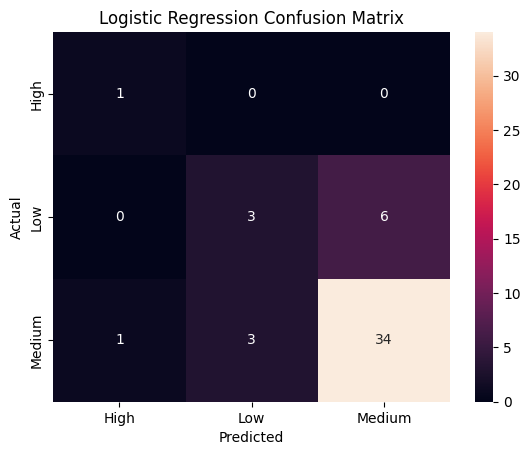

In [ ]:
# Predict on test set
y_pred = logreg.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Task #06 ongoing now i am using a diff model to achive the good acuracy while preventing the overfitting of the model because 79% accuracy is not that much good to predict the fire risk level so im using random forest model now

In [ ]:
def convert_score_to_level(score):
    if score < 0.3:
        return "Low"
    elif score < 0.7:
        return "Medium"
    else:
        return "High"

df["fire_risk_level"] = df["fire_risk_score"].apply(convert_score_to_level)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = df["fire_risk_level"]
y_encoded = label_encoder.fit_transform(y)


In [ ]:
X = df.drop(columns=["fire_risk_score", "fire_risk_level"])  # drop target columns
# Drop the Low class completely



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [ ]:
import numpy as np
unique, counts = np.unique(y_encoded, return_counts=True)
dict(zip(label_encoder.inverse_transform(unique), counts))


{'High': np.int64(239), 'Low': np.int64(1)}

**Task #07 Prepare your predictions for test data and save to CSV**

In [ ]:
# Drop target and irrelevant columns from features
X = df.drop(['fire_risk_level', 'fire_risk_level_encoded', 'random_noise'], axis=1)
y = df['fire_risk_level_encoded']

# Now split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on SAME structure
y_pred = model.predict(X_test)


In [ ]:
print("Train columns:", X_train.columns.tolist())
print("Test columns:", X_test.columns.tolist())


Train columns: ['temperature_C', 'humidity_percent', 'wind_speed_kmph', 'air_quality_index', 'vegetation_index', 'emergency_response_time_min', 'fire_risk_score']
Test columns: ['temperature_C', 'humidity_percent', 'wind_speed_kmph', 'air_quality_index', 'vegetation_index', 'emergency_response_time_min', 'fire_risk_score']


In [ ]:
# Ensure correct columns before splitting
X = df.drop(['fire_risk_level', 'fire_risk_level_encoded', 'random_noise'], axis=1)
y = df['fire_risk_level_encoded']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Align test columns with train
X_test = X_test[X_train.columns]

# Predict
y_pred = model.predict(X_test)


In [ ]:
# Manually convert to discrete class (based on threshold)
# Example: Thresholds at 0.5 and 1.5 for 3 classes: 0, 1, 2
y_pred = np.round(y_pred).astype(int)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.60      0.67      0.63         9
           2       0.89      0.89      0.89        38

    accuracy                           0.83        48
   macro avg       0.50      0.52      0.51        48
weighted avg       0.82      0.83      0.83        48


Confusion Matrix:
 [[ 0  0  1]
 [ 0  6  3]
 [ 0  4 34]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
print(os.listdir())


['.config', 'fire_risk_train.csv', 'fire_risk_test.csv', 'sample_data']


In [ ]:
test_df = pd.read_csv("fire_risk_test.csv")


In [ ]:
import pandas as pd

# Load the training data
train_df = pd.read_csv("fire_risk_train.csv")

# Now extract features (excluding the target)
X_train = train_df[['temperature_C', 'humidity_percent', 'wind_speed_kmph',
                    'air_quality_index', 'vegetation_index', 'emergency_response_time_min']]

# Set the classification target
y_train = train_df['fire_risk_level']


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
test_df = pd.read_csv("fire_risk_test.csv")

X_test_final = test_df[['temperature_C', 'humidity_percent', 'wind_speed_kmph',
                        'air_quality_index', 'vegetation_index', 'emergency_response_time_min']]

y_pred = model.predict(X_test_final)


In [ ]:
submission_df = pd.DataFrame({
    'id': test_df.index + 1,
    'fire_risk_level': y_pred
})
submission_df.to_csv("fire_risk_predictions.csv", index=False)


In [ ]:
import os
print(os.listdir())  # should list 'fire_risk_predictions.csv'


['.config', 'fire_risk_train.csv', 'fire_risk_predictions.csv', 'fire_risk_test.csv', 'sample_data']


In [ ]:
import pandas as pd

df = pd.read_csv('fire_risk_predictions.csv')
df.head()


,id,fire_risk_level
0,1,Low
1,2,Medium
2,3,Medium
3,4,Medium
4,5,Medium


In [ ]:
from google.colab import files
files.download('fire_risk_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the test data
test_df = pd.read_csv("fire_risk_test.csv")

# Show first few rows
test_df.head()


,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,random_noise
0,28.684219,39.679491,0.562655,74.242403,0.313197,2.884045,-0.089225
1,29.415549,44.846189,0.155674,52.918113,0.436912,3.563191,0.744584
2,25.664848,33.303496,1.400242,60.736317,0.548522,3.026515,1.247811
3,23.676716,44.150362,5.440338,50.130019,0.706796,3.453534,0.666166
4,27.454875,37.493174,1.469756,52.486911,0.570645,3.607346,-0.844279


In [ ]:
# Display all column names
print(test_df.columns)


Index(['temperature_C', 'humidity_percent', 'wind_speed_kmph',
       'air_quality_index', 'vegetation_index', 'emergency_response_time_min',
       'random_noise'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the training data again (if needed)
df = pd.read_csv("fire_risk_train.csv")

# Separate features and labels
X = df.drop(['fire_risk_score', 'fire_risk_level'], axis=1)
y = df['fire_risk_level']

# Split into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

clf = LogisticRegression(max_iter=5000)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_val_scaled)


# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.5833333333333334
Classification Report:
               precision    recall  f1-score   support

        High       0.50      1.00      0.67         1
         Low       0.33      0.27      0.30        15
      Medium       0.68      0.72      0.70        32

    accuracy                           0.58        48
   macro avg       0.50      0.66      0.55        48
weighted avg       0.57      0.58      0.57        48

Confusion Matrix:
 [[ 1  0  0]
 [ 0  4 11]
 [ 1  8 23]]
